In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('17-googleplaystore.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.columns=df.columns.str.replace(' ','_',regex=False)

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

In [7]:
df.dropna(subset=['Type','Content_Rating','Current_Ver','Android_Ver'],inplace=True)

In [8]:
df['Reviews']=df['Reviews'].astype(int)

In [9]:
df_clean=df.copy()

In [10]:
#her zaman çevirdiğimiz kolon tam çevirilemeyebilir kontrol etmemiz lazım
#df[~df['Reviews'].str.isnumeric()] numeric olmayan kolonu getitir
#df_clean=df_clean.drop(index(verinin indeks numarası))

In [11]:
#SIRAYLA KOLON KOLON GİDELİM
df_clean['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [12]:
df_clean['Size']=df_clean['Size'].str.replace('M','000',regex=False)
df_clean['Size']=df_clean['Size'].str.replace('k','',regex=False)

In [13]:
df_clean['Size']=df_clean['Size'].replace('Varies with device',np.nan,regex=False)

In [14]:
df_clean['Size']=df_clean['Size'].astype(float)

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          9360 non-null   float64
 3   Reviews         10829 non-null  int32  
 4   Size            9135 non-null   float64
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content_Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last_Updated    10829 non-null  object 
 11  Current_Ver     10829 non-null  object 
 12  Android_Ver     10829 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


In [16]:
#ŞİMDİ SIRA INSTALLS KISMINDA ORADA İSE + İŞARETİNİ KALDIRIP VİRGÜLLERİ NOKTA YAPACAĞIZ

In [17]:
df_clean['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [18]:
df_clean['Installs']=df_clean['Installs'].str.replace('+','',regex=False)
df_clean['Installs']=df_clean['Installs'].str.replace(',','.',regex=False)

In [19]:
#BÖYLE TEK TEK YAZMAK YERİNE FONKSİYONLA HALLEDEBİLİRİZ
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']

In [20]:
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_clean[cols]=df_clean[cols].str.replace(item,"")

In [21]:
df_clean['Price']=df_clean['Price'].astype(float)

In [22]:
df_clean['Installs'] = (
    df_clean['Installs']
    .astype(str)
    .str.replace(r'[\.,\+ ]', '', regex=True)   # ., + ve boşlukları sil
    .astype(int)
)

In [23]:
df_clean['Installs']=df_clean['Installs'].astype(int)

In [24]:
#ŞİMDİ TARİHLERİ DÜZELTELİM

In [25]:
df_clean['Last_Updated']=pd.to_datetime(df_clean['Last_Updated'])

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10829 non-null  object        
 1   Category        10829 non-null  object        
 2   Rating          9360 non-null   float64       
 3   Reviews         10829 non-null  int32         
 4   Size            9135 non-null   float64       
 5   Installs        10829 non-null  int32         
 6   Type            10829 non-null  object        
 7   Price           10829 non-null  float64       
 8   Content_Rating  10829 non-null  object        
 9   Genres          10829 non-null  object        
 10  Last_Updated    10829 non-null  datetime64[ns]
 11  Current_Ver     10829 non-null  object        
 12  Android_Ver     10829 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 1.1+ MB


In [27]:
#ÇEVİRME İŞLEMİNİ YAPTIKTAN SONRA DİYELİM Kİ GÜNÜ AYRI BİR KOLONA ALMAK İSTİYORSAK
#DF_CLEAN['DAY']=DF_CLEAN['DAY'].DT.DAY 
#AY VE YIL İÇİNDE AYNI ŞEY UYGULANIR

In [28]:
df_clean['Year']=df_clean['Last_Updated'].dt.year
df_clean['Month']=df_clean['Last_Updated'].dt.month

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10829 non-null  object        
 1   Category        10829 non-null  object        
 2   Rating          9360 non-null   float64       
 3   Reviews         10829 non-null  int32         
 4   Size            9135 non-null   float64       
 5   Installs        10829 non-null  int32         
 6   Type            10829 non-null  object        
 7   Price           10829 non-null  float64       
 8   Content_Rating  10829 non-null  object        
 9   Genres          10829 non-null  object        
 10  Last_Updated    10829 non-null  datetime64[ns]
 11  Current_Ver     10829 non-null  object        
 12  Android_Ver     10829 non-null  object        
 13  Year            10829 non-null  int32         
 14  Month           10829 non-null  int32         
dtypes: date

In [30]:
df_clean.isnull().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Size              1694
Installs             0
Type                 0
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
Current_Ver          0
Android_Ver          0
Year                 0
Month                0
dtype: int64

In [31]:
df_clean.duplicated('App').sum()

1181

In [32]:
df_clean.drop_duplicates(subset='App',keep='first',inplace=True) # keep first ile ilk gördüğünü tut dedik

In [33]:
numerical_features=[features for features in df_clean.columns if df_clean[features].dtype!='O']
categorical_features=[features for features in df_clean.columns if df_clean[features].dtype=='O']

In [34]:
numerical_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Last_Updated',
 'Year',
 'Month']

In [35]:
categorical_features

['App',
 'Category',
 'Type',
 'Content_Rating',
 'Genres',
 'Current_Ver',
 'Android_Ver']

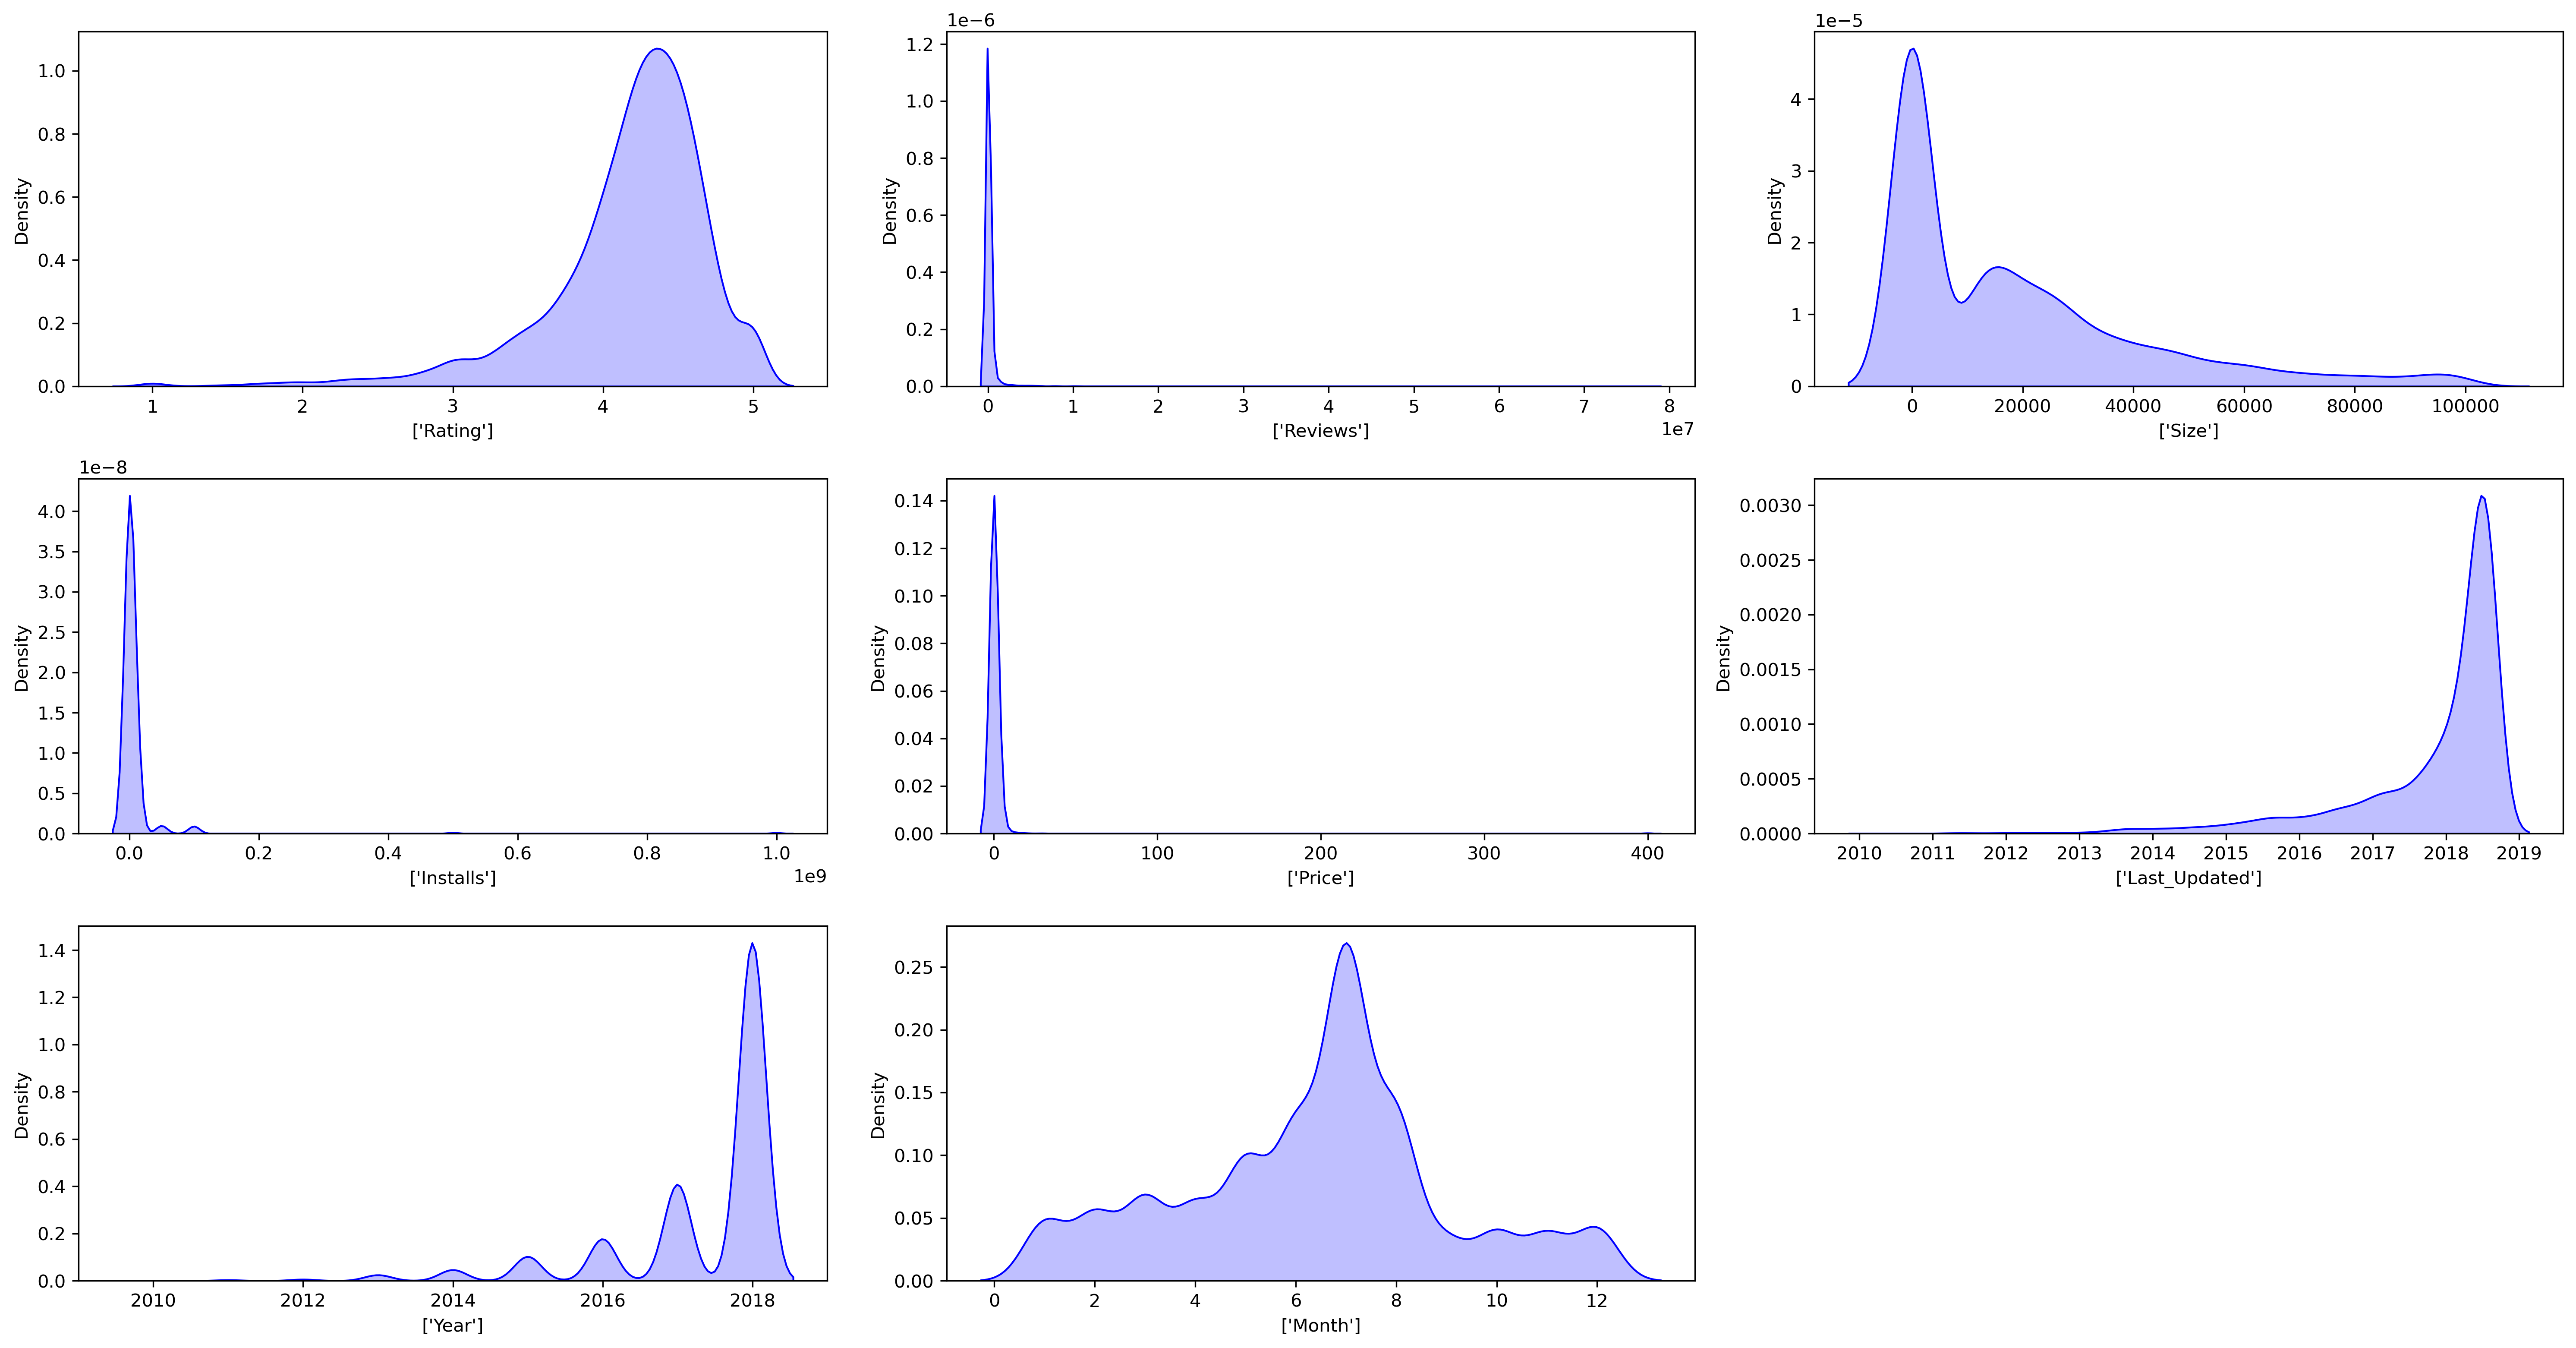

In [36]:
plt.figure(figsize=(20,17),dpi=300)
for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_clean[numerical_features[i]],color='blue',fill=True) #fill true içini doldurur
    plt.xlabel([numerical_features[i]])
    plt.tight_layout()
    

In [37]:
category=['Type','Content_Rating']

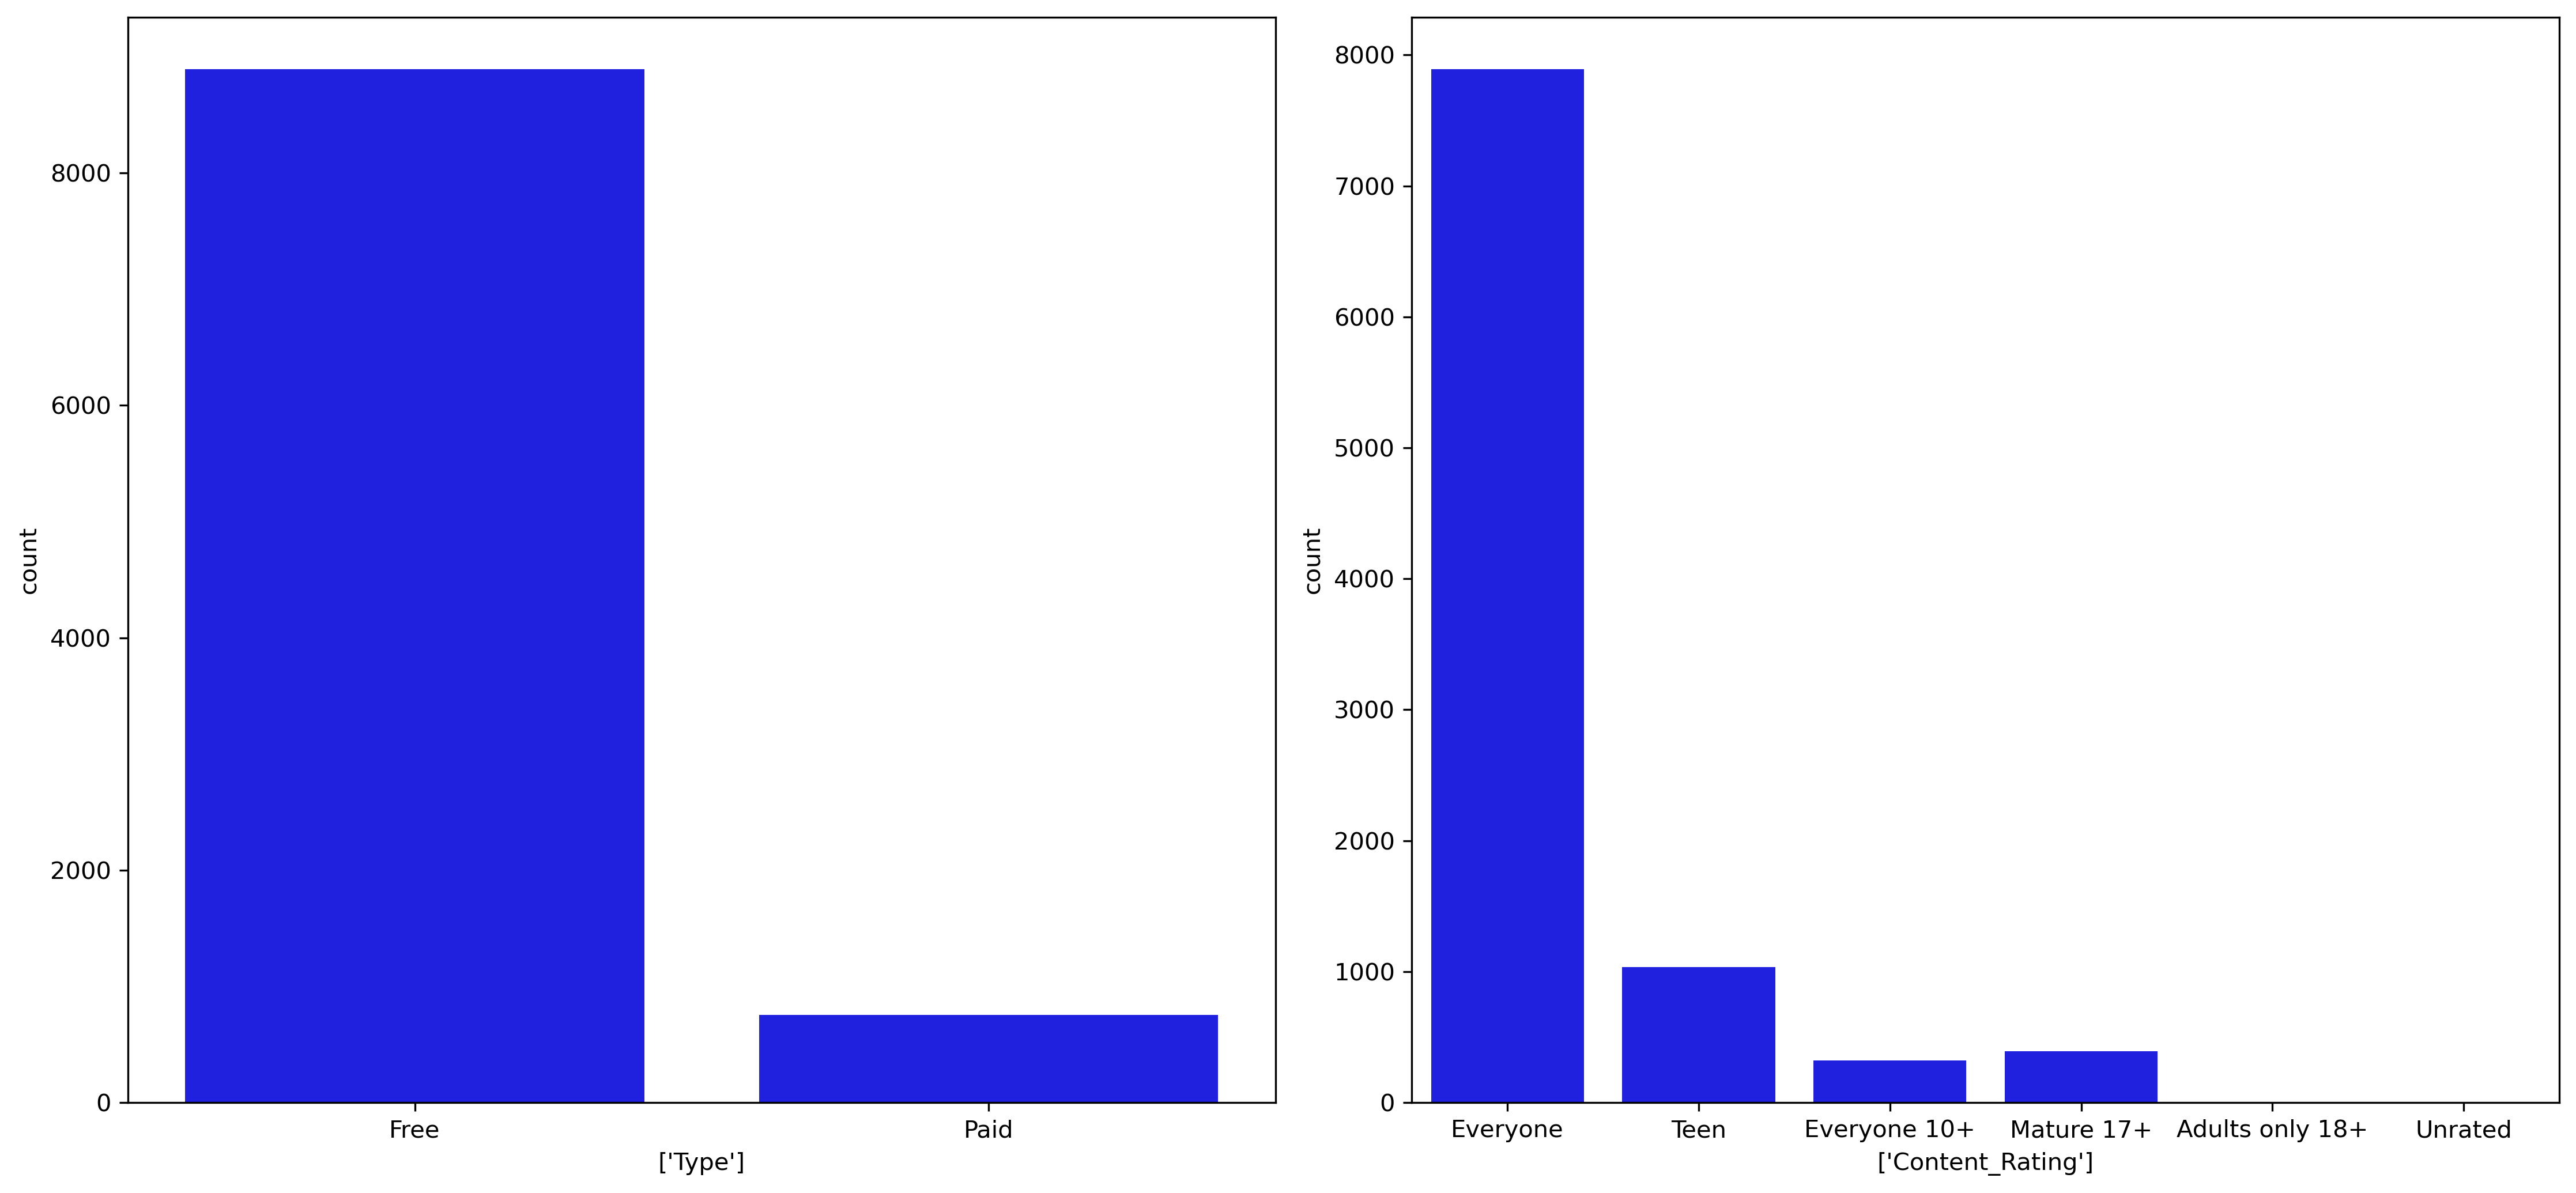

In [38]:
plt.figure(figsize=(15,7),dpi=300)
for i in range(0,len(category)):
    plt.subplot(1,2,i+1)
    sns.countplot(x=df_clean[category[i]],color='blue',fill=True) #fill true içini doldurur
    plt.xlabel([category[i]])
    plt.tight_layout()
    

In [39]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Year,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


In [40]:
ornek_frame=pd.DataFrame(df_clean.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index())

In [41]:
ornek_frame['Installs']=ornek_frame['Installs']/1000000000

Text(0.5, 0, 'Installs in billion')

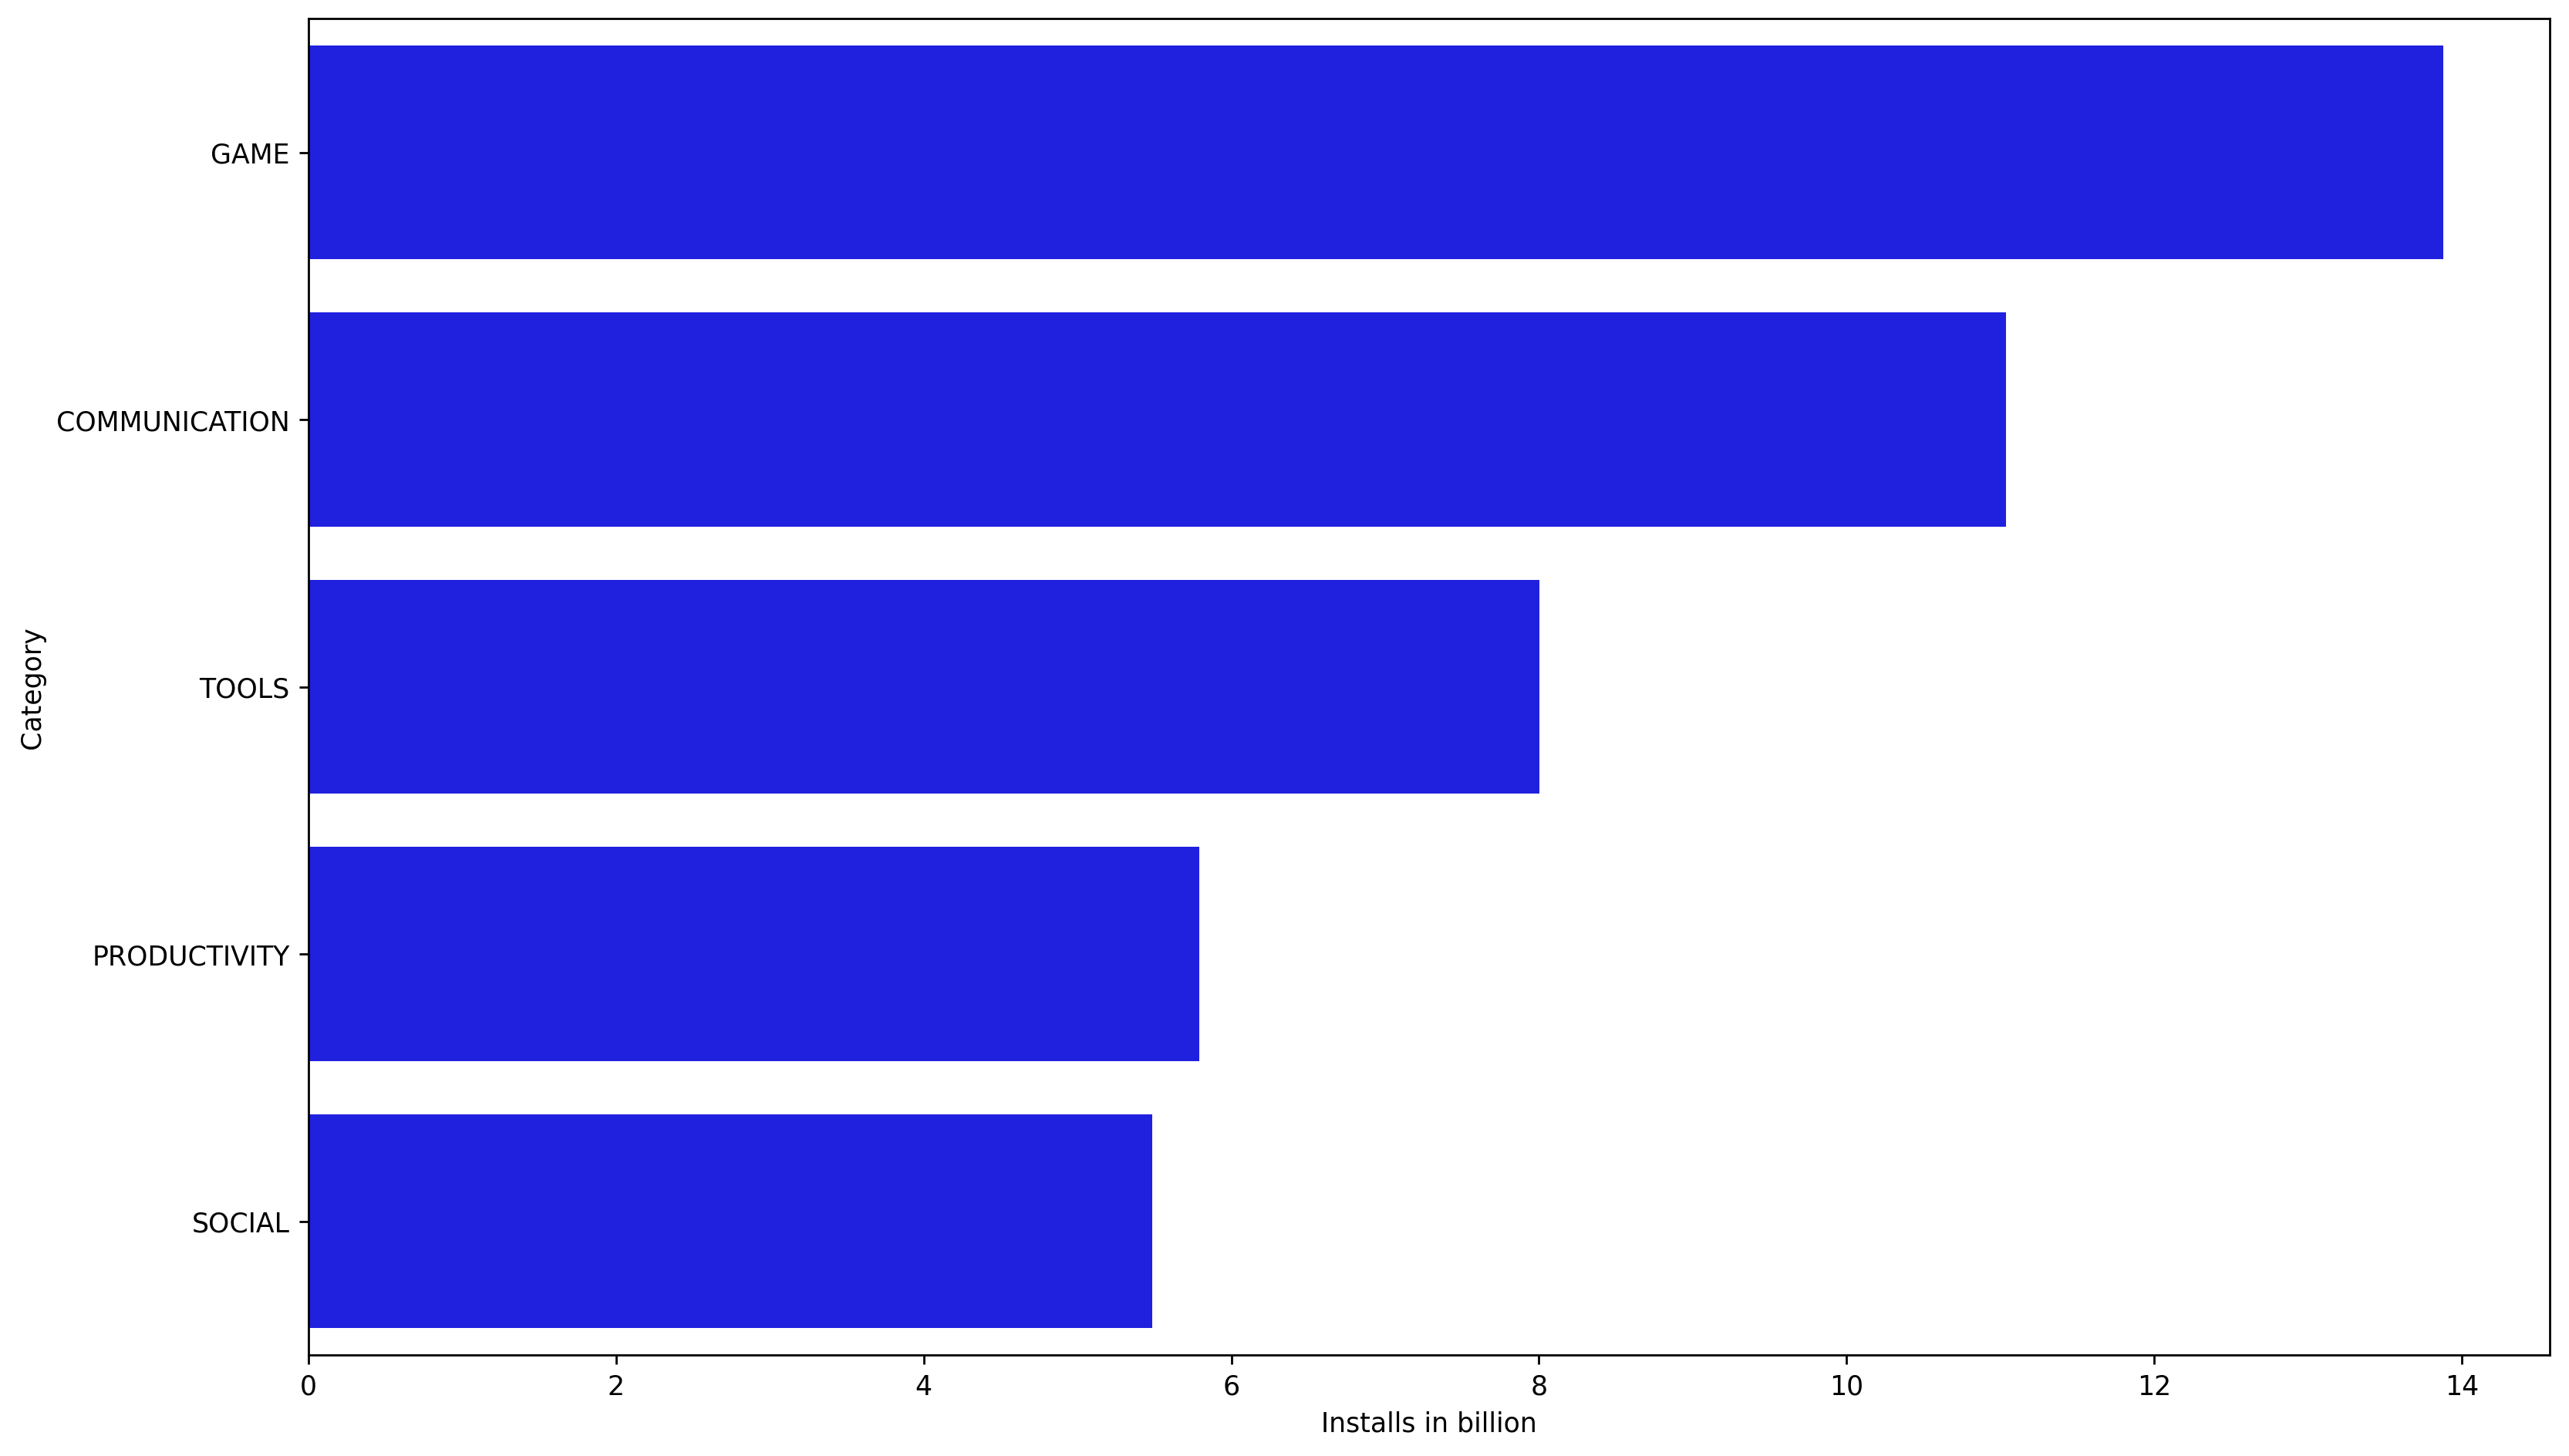

In [42]:
plt.figure(figsize=(15,9),dpi=250)
sns.barplot(data=ornek_frame,x=ornek_frame['Installs'],y=ornek_frame['Category'][:5:],color='b',fill=True)
plt.xlabel('Installs in billion')

In [43]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Year,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


In [44]:
df_app_category=df_clean.groupby(['Category','App'])['Installs'].sum().reset_index()
df_app_category=df_app_category.sort_values('Installs',ascending=False)

In [45]:
top_5_apps=ornek_frame['Category'][:5:]
top_5_apps

0             GAME
1    COMMUNICATION
2            TOOLS
3     PRODUCTIVITY
4           SOCIAL
Name: Category, dtype: object

In [46]:
plt.figure(figsize=(30,28),dpi=400)

for i,app in enumerate(top_5_apps):
    top_finally=df_app_category[df_app_category.Category==app]
    top_finally=top_finally.head(5)

    plt.subplot(3,2,i+1)
    sns.barplot(data=top_finally,x='Installs',y='App')
    plt.title(app,size=20)

plt.show()

In [47]:
rating_df=df_clean.groupby(['Category','Installs','App'])['Rating'].sum().reset_index()

In [48]:
rating_df[rating_df['Rating']==5.0].sort_values('Installs',ascending=False)

,Category,Installs,App,Rating
2385,FAMILY,10000,Ek Bander Ne Kholi Dukan,5.0
5518,LIFESTYLE,5000,Oración CX,5.0
848,COMICS,5000,"Superheroes, Marvel, DC, Comics, TV, Movies News",5.0
8598,TOOLS,5000,CL Keyboard - Myanmar Keyboard (No Ads),5.0
2165,FAMILY,1000,Safe Santa Fe,5.0
...,...,...,...,...
3960,GAME,5,Brick Breaker BR,5.0
5868,MEDICAL,5,Anatomy & Physiology Vocabulary Exam Review App,5.0
3957,GAME,1,Ra Ga Ba,5.0
5861,MEDICAL,1,KBA-EZ Health Guide,5.0


In [49]:
df_clean.groupby(['Category'])['Rating'].mean().sort_values(ascending=False).reset_index()

,Category,Rating
0,EVENTS,4.435556
1,ART_AND_DESIGN,4.376667
2,EDUCATION,4.364407
3,BOOKS_AND_REFERENCE,4.344970
4,PERSONALIZATION,4.331419
5,PARENTING,4.300000
6,BEAUTY,4.278571
7,GAME,4.247368
8,SOCIAL,4.247291
9,WEATHER,4.243056


In [50]:
df_clean['Android_Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [51]:
df_clean['Android_Ver']=df_clean['Android_Ver'].str.replace('and up','',regex=True).replace('Varies with device',np.nan,regex=True).replace('W','',regex=True)

In [52]:
df_clean=df_clean[df_clean['Android_Ver'].str.contains('-')==False]

In [53]:
df_clean['Android_Ver'].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ', '5.1 ',
       '4.3 ', '2.0 ', '3.2 ', '7.1 ', '8.0 ', '3.1 ', '2.0.1 ', '1.0 '],
      dtype=object)

In [54]:
df_genres_ınstalls=df_clean.groupby(['Genres'])['Installs'].mean()/1000000

In [55]:
df_genres_ınstalls

Genres
Action                                   11.255844
Action;Action & Adventure                 3.910955
Adventure                                 4.064319
Adventure;Action & Adventure             21.230000
Adventure;Brain Games                     0.100000
                                           ...    
Video Players & Editors                   7.093219
Video Players & Editors;Creativity        5.000000
Video Players & Editors;Music & Video     5.000000
Weather                                   2.270176
Word                                      5.208628
Name: Installs, Length: 117, dtype: float64